# Config.

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###### Data Cleaning
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

###### Models
# ~~~~~~~~~~~ Regression
from sklearn.linear_model import LinearRegression

# ~~~~~~~~~~~ Classifiers
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

##### Measuring models
from sklearn.model_selection import cross_val_score

#from sklearn.ensemble import *
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

This problem uses continuous data, which is the 'price' of the diamond, and consists of a range of infinite values.

The objective is to generate predictions with a low Mean Squared Error.

### Configure `PATH` for `LOCAL JUPYTER` or `Google Colab`

    """
    # Google Colab Setup
    from os.path import join
    from google.colab import drive

    ROOT = "/content/drive"
    drive.mount(ROOT)
    
    PATH = "/My Drive/data/"
    """

In [2]:
# Local Jupyter Setup
PATH='../INPUT/'

# Load Training Dataset as `data_train`

In [3]:
raw_data_train = pd.read_csv(f'{PATH}diamonds_train.csv').drop(columns='Unnamed: 0')
raw_data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


###### `dtypes`

In [4]:
raw_data_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

###### `value_counts`

In [5]:
# Diamond Cut
raw_data_train.cut.value_counts()

Ideal        16090
Premium      10339
Very Good     9036
Good          3694
Fair          1186
Name: cut, dtype: int64

In [6]:
# Diamond Color
raw_data_train.color.value_counts()

G    8499
E    7351
F    7130
H    6234
D    5074
I    4023
J    2034
Name: color, dtype: int64

In [7]:
# Diamond Clarity
raw_data_train.clarity.value_counts()

SI1     9751
VS2     9178
SI2     6828
VS1     6101
VVS2    3858
VVS1    2714
IF      1362
I1       553
Name: clarity, dtype: int64

### Values to predict, a.k.a. : `label`

In [22]:
# LABEL: Diamond Price
raw_data_train.price.value_counts().head()

625    99
789    96
605    95
776    94
596    93
Name: price, dtype: int64

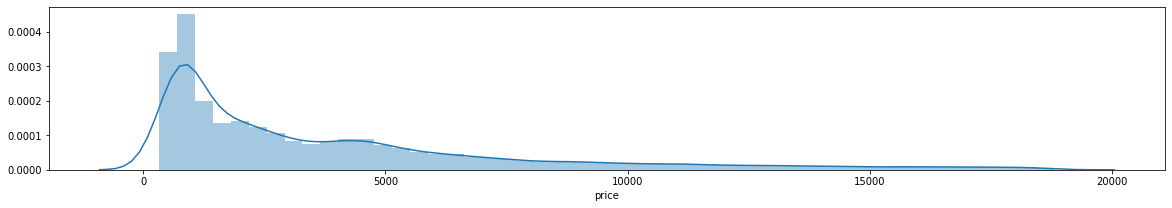

In [9]:
plt.figure(figsize=(20,3))
sns.distplot(raw_data_train.price)

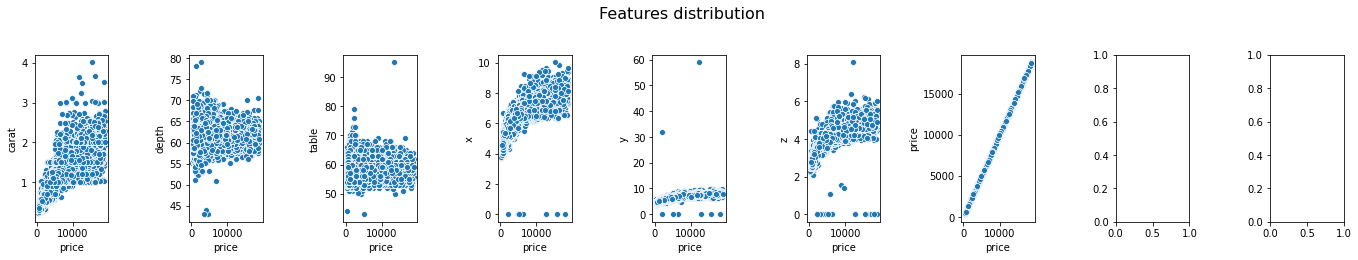

In [43]:
f,a = plt.subplots(1, len(X_columns), figsize=(20,4))
f.tight_layout(pad=5)
f.suptitle('Features distribution\n', size=16)

for i, column in enumerate(data.columns):
    sns.scatterplot(data.price, data[column],ax=a[i])

In [32]:
df = raw_data_train
X_columns = df.drop(columns='price').columns

ValueError: could not convert string to float: 'Ideal'

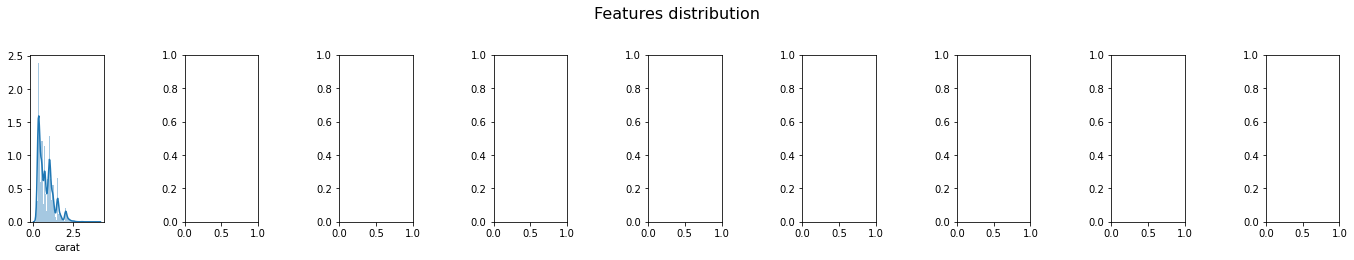

In [39]:
f,a = plt.subplots(1, len(X_columns), figsize=(20,4))
f.tight_layout(pad=5)
f.suptitle('Features distribution\n', size=16)


for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=a[i])
#    a[i].set_title([i])

## Notes from a basic investigation:

    """
    After interviewing a Diamond seller, they have recommended the use of 4 main features which are considered when calculating the price of a diamond.


    **If these features are all positive, have "balanced values", such as clarity, color, etc. the diamond will sell with a very high price.**
    """
    
    
    
    """
    The dataset contains no null values. It is composed of 8 coninuous variables and 3 categorical values.
    """
    
    """
    By looking at the distribution of the `prices`, we can see that the diamonds are more frequently under price of `5000`. Although the maximum price registered is around `20000`, giving this data to our model could actually make it less precise.
    """
    
    """
    another observation here
    """

# Data States

- Proposed:
    - `normal_price`: Do not consider very high prices
    - `four_main_features`: As described by the diamond seller

In [10]:
# We'll make a dictionary with the different states for my data inputs
# we will be updating this dictionary as we create new data_states to use with the models

data_input_states = {
    'raw':raw_data_train,
}    

### Normalization and Standarization

In [11]:
data = data_input_states['raw'].copy()
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [12]:
# Drop all the non-numeric fields for a first test
def to_numeric(data, columns=None):
    numeric_train_data = data.copy()
    
    for column, dtype in zip(numeric_train_data.columns, numeric_train_data.dtypes):
        if (dtype != 'float64') and (dtype != 'int64'):
            print(f"Dropping the column '{column}', with the dtype {dtype}")   
            numeric_train_data = numeric_train_data.drop(columns=column)
        
    return numeric_train_data

In [13]:
numeric_train = to_numeric(data, columns=['cut','color', 'clarity'])
numeric_train.head(2)

Dropping the column 'cut', with the dtype object
Dropping the column 'color', with the dtype object
Dropping the column 'clarity', with the dtype object


,carat,depth,table,x,y,z,price
0,1.21,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,64.0,56.0,4.14,4.17,2.66,532


In [14]:
numeric_train.describe()

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


In [15]:
## Make sure to always make the data variable turn back to its OUTPUT format correctly
data = numeric_train.copy()

# Preparing variables `X` and `y`

In [16]:
def prepare_train_data(dataset, drop_columns=None, label=None):
    dataset = dataset.drop(columns=drop_columns)
    X = dataset.drop(columns=label).copy()
    y = dataset[label].copy()
    return X, y

    drop_these = ['cut','color', 'clarity','Unnamed: 0'] # ONLY CONTINUOUS DATA
    # drop_these = ['Unnamed: 0']
    label = 'price'

*In the case the dataset has variables with non-numeric data (such as the color of a diamond, we have to process that data to help with training of the model)*

In [17]:
X, y = prepare_train_data(data_train, drop_columns=drop_these ,label=label)

NameError: name 'data_train' is not defined

In [ ]:
#Save the Labels for future graphs
X_columns = X.columns

# Evaluate `dtypes`

In [ ]:
#

# Standardize with `Mean = 0` and   `Standard Deviation = 1`

In [ ]:
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(X)

## Visualize the data

In [ ]:
df = pd.DataFrame(Xpr)

In [ ]:
f,a = plt.subplots(1, len(X_columns), figsize=(20,4))
f.tight_layout(pad=5)
f.suptitle('Features distribution\n', size=16)
for i, column in enumerate(df.columns):
    a[i].hist(df[column])
    a[i].set_title(X_columns[i])

## Train, test, split

In [ ]:
print(f"Currently available data_states to use as input:")
print(data_input_states.keys())

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define my models

In [ ]:
models = {
    'linear_regression':LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None),
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=10),
    #"svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=3),
   # "randomforest": RandomForestClassifier(n_estimators=100),
}

# Predict using the LABELED data `X = data_train`

In [ ]:
print("current data: X and y")
display(X_train.head(3))
display(y_train[:3])

In [ ]:
trained = models['linear_regression'].fit(X_train, y_train)

In [ ]:
my_trained_prediction = trained.predict(X_test)
my_trained_prediction == y_test.sum()

In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f"({name}) acccuracy={np.mean(scores)}")

# Predict using the UNLABELED data `X = data_test`

In [ ]:
data_test = pd.read_csv(f'{PATH}data/diamonds_test.csv')
data_test.head(3)

In [ ]:
def prepare_test_data(dataset, drop_columns=None):
  X = dataset.drop(columns=drop_columns)
  return X

In [ ]:
# Prepare my data, using the configuration from previous steps
X = prepare_test_data(data_test, drop_columns=drop_these)

In [ ]:
Xpr = tr.fit_transform(X)

In [ ]:
print(Xpr[0]) # Array of processed model
print(Xpr.shape)

In [ ]:
trained = models['linear_regression'].fit(X_train, y_train)

In [ ]:
my_prediction = trained.predict(X)
pd.DataFrame(my_prediction).head(2)

In [ ]:
df = pd.DataFrame(my_prediction)
df = df.reset_index()
df.head(2)

In [ ]:
df.columns = ['id', 'price']
df.head(3)

In [ ]:
PATH = "../OUTPUT/"

In [ ]:
df.to_csv(f'{PATH}my_prediction.csv', columns=['id','price'], index_label=False,index=False)

In [ ]:
submission = pd.read_csv(f'{PATH}my_prediction.csv')
submission.head(3)